In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.ffd import FFD

In [16]:
howard = pd.read_csv("howard2019_alphabeta.tsv",delimiter="\t")
howard.alpha = howard.alpha + 1.
howard

,index,SpT,alpha,beta
0,1,K5,2.34,44.55
1,2,K7,2.34,44.55
2,3,M0,1.96,31.05
3,4,M1,1.88,28.50
4,5,M2,1.84,26.82
5,6,M3,2.25,40.02
6,7,M4,1.97,30.45


In [48]:
df = pd.read_csv("tables/cluster_SpT_alphabeta.csv")
dffull = pd.read_csv("tables/full_sample_alphabeta.csv").set_index("Unnamed: 0")
ilin = pd.read_csv("old_beta_ilin.csv")

In [58]:
alpha_en = float(dffull.loc["alpha_en","0"])
beta_en = float(dffull.loc["beta_en","0"])

No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.
No total observing time given. Set to 1.
Setting ED with new values, size 3.

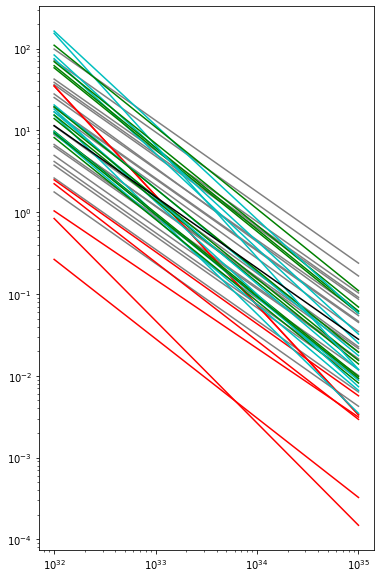

In [61]:
fig, ax = plt.subplots(1,figsize=(6,10))
ed = np.linspace(1e32,1e35,3)

for label, row in df.iterrows():
    ffd = FFD(alpha=row.alpha_en, beta=row.beta_en)
    ffd.ed = ed
    ffd.plot_powerlaw(ax, c="grey")
    
for label, row in howard.iterrows():
    ffd = FFD(alpha=row.alpha, beta=np.power(10,row.beta))
    ffd.ed = ed
    ffd.plot_powerlaw(ax, c="r")
    
for label, row in ilin.iterrows():
    ffd = FFD(alpha=row.alpha, beta=np.power(10,row["log10 beta"]))
    ffd.ed = ed
    ffd.plot_powerlaw(ax, c="c")
    ffd = FFD(alpha=2, beta=np.power(10,row["log10 beta2"]))
    ffd.ed = ed
    ffd.plot_powerlaw(ax, c="g")
    

ffd = FFD(alpha=alpha_en, beta=beta_en)
ffd.ed = ed
ffd.plot_powerlaw(ax, c="k")
    
plt.yscale("log")
plt.xscale("log")